In [ ]:
from simulation_manager import *

In [2]:
from epi_model import *

In [3]:
from simulation_helper import *

In [ ]:
manager = simulation_manager()
manager.load_net('high school 1')

In [9]:
strats = [
    sampling.none,
    #sampling.rand
]

argset = iter_args({
    'strat': {x.__name__: x for x in strats},
    'R0_mean': [0.1, 0.5, 1,2.5,3.5,5,10,50,100],
    'VACCINATE_P': 0.20,
    'INITIAL_INFECT': 20
})

In [7]:
if False:
    weights = [w for (u,v,w) in manager.G.edges.data('weight') ]
    plt.hist(weights, bins=30)
    plt.show()

Doing frozendict({'INITIAL_INFECT': 20, 'R0_mean': 0.1, 'VACCINATE_P': 0.2, 'strat': 'none'}). 0/9. 0 to do.
frozendict({'INITIAL_INFECT': 20, 'R0_mean': 0.1, 'VACCINATE_P': 0.2, 'strat': 'none'}) {'INITIAL_INFECT': 20, 'R0_mean': 0.1, 'VACCINATE_P': 0.2, 'strat': <function none at 0x000001E6B9580E58>}
Doing frozendict({'INITIAL_INFECT': 20, 'R0_mean': 0.5, 'VACCINATE_P': 0.2, 'strat': 'none'}). 1/9. 0 to do.
frozendict({'INITIAL_INFECT': 20, 'R0_mean': 0.5, 'VACCINATE_P': 0.2, 'strat': 'none'}) {'INITIAL_INFECT': 20, 'R0_mean': 0.5, 'VACCINATE_P': 0.2, 'strat': <function none at 0x000001E6B9580E58>}
Doing frozendict({'INITIAL_INFECT': 20, 'R0_mean': 1, 'VACCINATE_P': 0.2, 'strat': 'none'}). 2/9. 0 to do.
frozendict({'INITIAL_INFECT': 20, 'R0_mean': 1, 'VACCINATE_P': 0.2, 'strat': 'none'}) {'INITIAL_INFECT': 20, 'R0_mean': 1, 'VACCINATE_P': 0.2, 'strat': <function none at 0x000001E6B9580E58>}
Doing frozendict({'INITIAL_INFECT': 20, 'R0_mean': 2.5, 'VACCINATE_P': 0.2, 'strat': 'none'}).

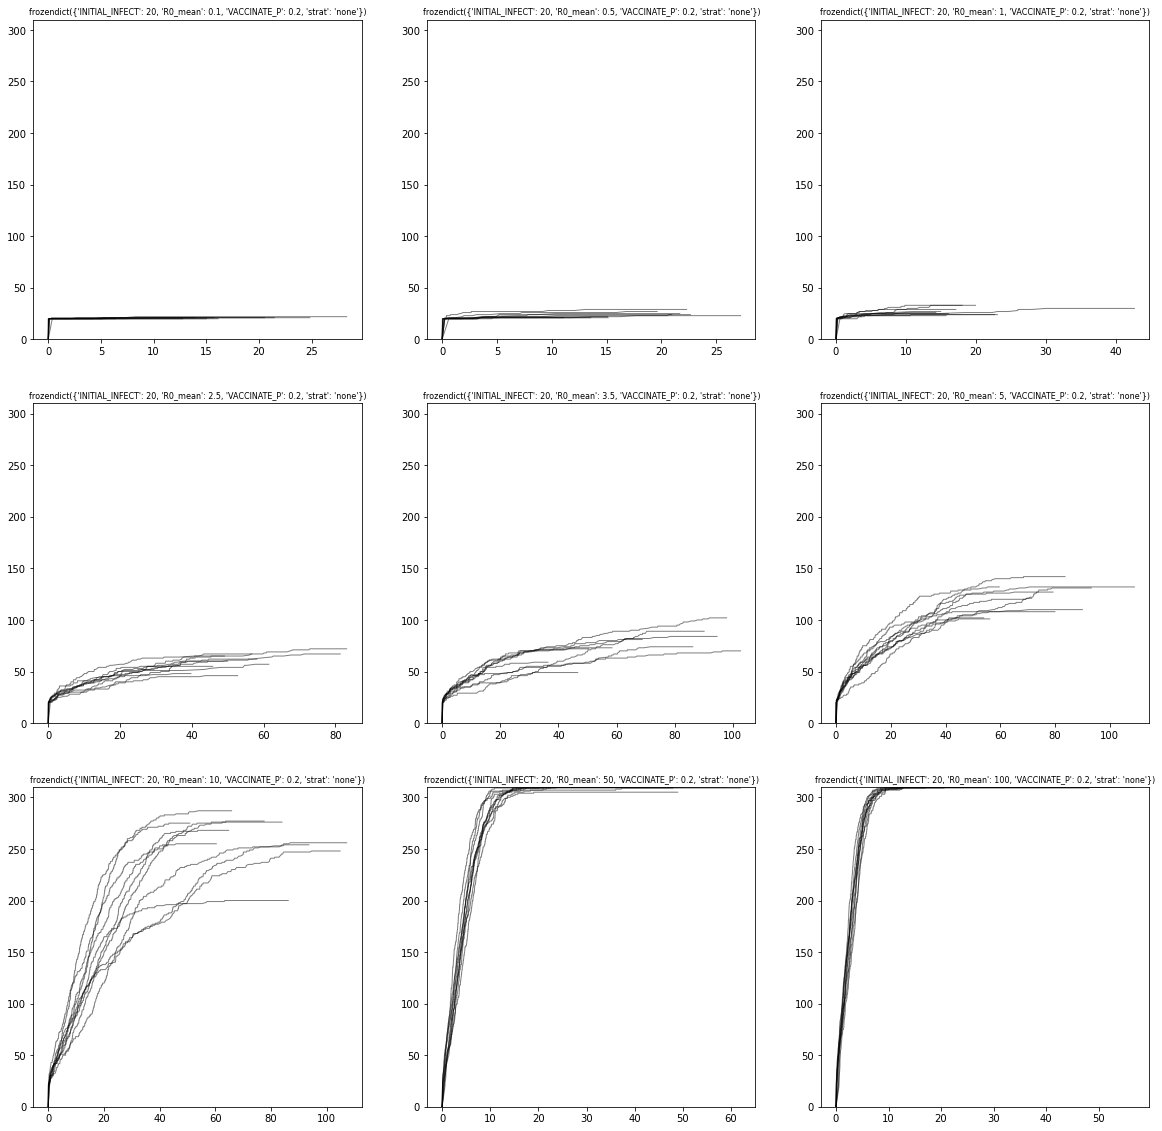

In [10]:
manager.run(argset, N_PER=10)
manager.summarize_models()

In [7]:
m = manager.most_recent_model

In [21]:
m.A.shape

(310, 310)

In [22]:
m.delta.shape

(310, 1)

In [26]:
m.beta

array([[0.0228473 ],
       [0.01277848],
       [0.01294729],
       [0.0214679 ],
       [0.02388178],
       [0.01303255],
       [0.00901834],
       [0.01795208],
       [0.01379349],
       [0.03711333],
       [0.0144187 ],
       [0.01493368],
       [0.01887508],
       [0.01393305],
       [0.02064423],
       [0.01447687],
       [0.02219252],
       [0.0118143 ],
       [0.01317047],
       [0.01725452],
       [0.02654058],
       [0.02088076],
       [0.01946025],
       [0.0258029 ],
       [0.01804294],
       [0.03279171],
       [0.02601843],
       [0.01027002],
       [0.02347359],
       [0.01188048],
       [0.01830689],
       [0.01733963],
       [0.01984365],
       [0.01773344],
       [0.02407278],
       [0.01286837],
       [0.0159872 ],
       [0.04220019],
       [0.01253107],
       [0.00905309],
       [0.01235869],
       [0.01171025],
       [0.01221384],
       [0.02020291],
       [0.02086379],
       [0.02882041],
       [0.0075311 ],
       [0.019

In [29]:
.0111111 * .0228

0.00025333308

In [27]:
m.A.toarray()

array([[0.        , 0.01111111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
m.A.shape

(310, 310)

In [31]:
type(m.A)(np.multiply( m.A.toarray(), m.beta ))

<310x310 sparse matrix of type '<class 'numpy.float64'>'
	with 5146 stored elements in Compressed Sparse Row format>

In [ ]:
for k in manager.models:
    print(k, np.mean( [x['numS'][-1] for x in manager.models[k]] ))